# Data Argumentation
A common problem, is the amount of data available to enter the models, for models to present the expected results it is necessary for training to occur with a large amount of data (dataset), but in many cases the data needed to perform these tasks is not available.
This is where the **Data Augmentation** technique comes in that, as the name suggests, allows us to augment our dataset in two ways:




*   Introducing disturbances in the original data. For example: taking an original image centered, we replicate it off-center, reversing axes…
*   Using different distributions. Example: if we want to train a model to classify high-resolution images, we add low-resolution images, with noise… always maintaining the highest high-resolution ratio.



At first, neural networks are not intelligent. For example, a poorly trained neural network would think that these three tennis balls shown below are distinct and unique images.

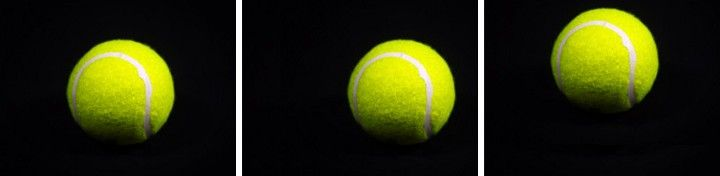



The same ball with some translations.



So if we work with images, it is only necessary to make some small alterations to our dataset and we can achieve our goal.
There are many ways to augment data with images, such as:


1.   Turn around (Flip)
2.   Rotation

1.   Scale
2.   Cutout

1.   Traslation
2.   Gaussian noise









The Keras library provides the ability to use data augmentation automatically when training a model. This is accomplished by using the ImageDataGenerator class. A variety of techniques are supported, as well as pixel scaling methods, such as:

*   Changes to the image (translations) through the **width_shift_range and height_shift_range** arguments.
*  Flipping the image using the **horizontal_flip and vertical_flip** arguments.
*   Image rotations via the **rotation range** argument
*  Image brightness using the **brightness_range** argument.
*   Image zoom using the **zoom_range** argument.

Let's independently look at examples of images after they have been magnified. It is common to use a variety of augmentation techniques at the same time during training.


In [6]:
import matplotlib.pyplot as plt    #Libreria que permite graficar, muy al estilo de MATLAB
import numpy as np                  #Libreria que permite trabajar con arreglo  
from numpy import expand_dims       #Expande la forma del arreglo 
from keras.preprocessing.image import load_img    #De la libreria de Keras para aumentacion de datos, cargamos la imagen en el formato de la libreria de imagenes de python (PIL)
from keras.preprocessing.image import img_to_array #tomará una  imagen (PIL) y la convierte en una matriz. Si parte de una imagen PNG, los valores dentro de la imagen estarán entre 0 y 255.
from keras.preprocessing.image import ImageDataGenerator #clase que toma datos originales, los transforma de forma aleatoria y devuelve solo los datos nuevos transformados
from PIL import Image #libreria de imagenes de python
from urllib.request import urlopen #Permite leer una direccion electronica


Primero cargamos una imagen de internet


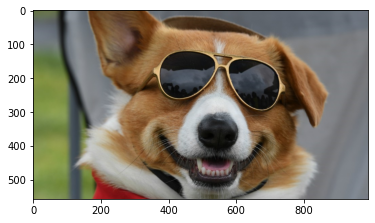

In [7]:
url = 'https://imagenesntn24.canalrcn.com/ImgNtn24/perros_2.jpg' 
filename = urlopen(url)
img = Image.open(filename)
plt.imshow(img)

Let's start with a makeover which means moving all the pixels in the image in one direction, such as horizontally or vertically, while keeping the same image dimensions.

The width_shift_range and height_shift_range arguments of the ImageDataGenerator constructor control the amount of horizontal and vertical scrolling respectively.

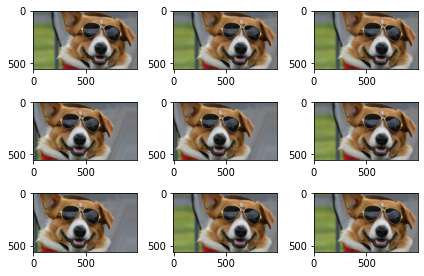

In [8]:
# Convertimos la imagen a un arreglo
data = img_to_array(img)
# realizamos una expansion a una muestra 
samples = expand_dims(data, 0)
# Creamos el aumentador de datos utilizando solo cambio de imgen 
datagen = ImageDataGenerator(width_shift_range=[-100,100])
# preparamos el iterator
it = datagen.flow(samples, batch_size=1)
# generamos muestras y mostramos los resultados
for i in range(9):
	plt.subplot(330 + 1 + i)
	# se generan lotes de imagenes
	batch = it.next()
	image = batch[0].astype('uint8') #se convierte a un valor valido para poder mostrarlo como imagen 
	plt.imshow(image)
	plt.tight_layout()
plt.show()



An image flip means to reverse the rows or columns of pixels in the case of a vertical or horizontal flip, respectively. Magnification is specified by a **horizontal_flip or vertical_flip** Boolean argument for the **ImageDataGenerator** class.

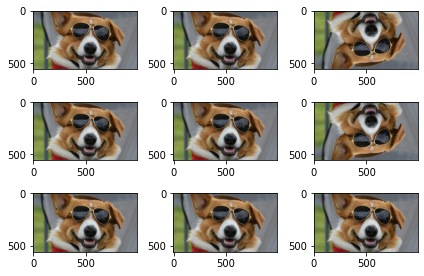

In [9]:
datagen = ImageDataGenerator(vertical_flip=True)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()


The amount of zoom is sampled uniformly at random from the zoom region for each dimension (width, height) separately.

Floating or [lower limit, upper limit]. Range for random zoom. If it is a float, [lower bound, upper bound] = [1-zoom_range, 1 + zoom_range]

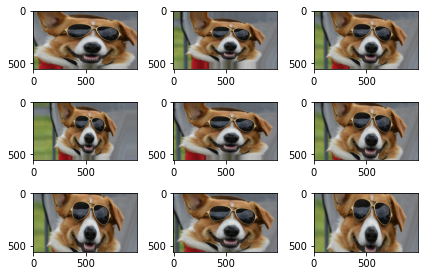

In [10]:

datagen = ImageDataGenerator(zoom_range=0.3) #float o Rango [lower,upper]
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The image is randomly rotated clockwise a specified number of degrees from 0 to 360. It is likely to rotate pixels outside of the image frame, leaving areas of the frame with no pixel data, which need to be filled.

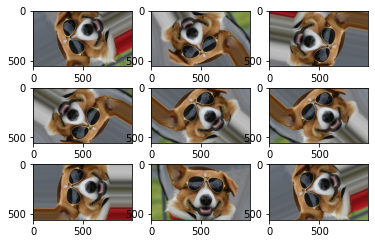

In [11]:
datagen = ImageDataGenerator(rotation_range=200,)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

The combination of these techniques allows us to increase the amount of data in the dataset to be used, in many jobs a data augmentation is used to increase the amount of training images and improve the precision of the job.



              
              featurewise_center: Boolean, set the mean of each element to zero of all data.

              samplewise_center **: Boolean, set the mean of each sample to zero

              featurewise_std_normalization: Boolean, Divide the inputs by the standard deviation (std.) of the data set, based on the characteristics.
              
              samplewise_std_normalization: Boolean, divide each data by its std.

              zca_epsilon: The default is 1e-6.
              
              zca_whitening: Boolean, indicates if ZCA whitening is applied.
              
                

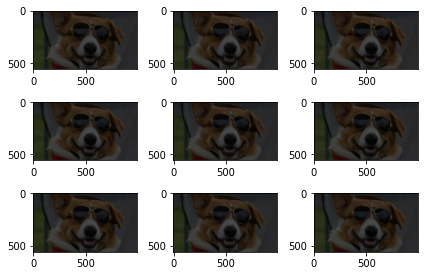

In [12]:
datagen = ImageDataGenerator(rescale=1/3)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

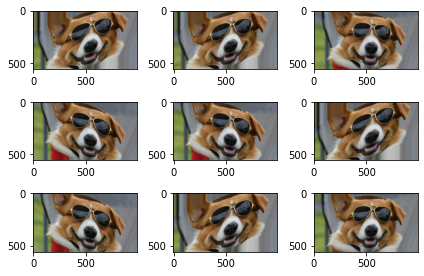

In [13]:
datagen = ImageDataGenerator(shear_range=30)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

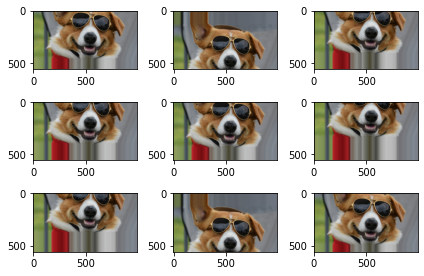

In [14]:
datagen = ImageDataGenerator(height_shift_range=0.4)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

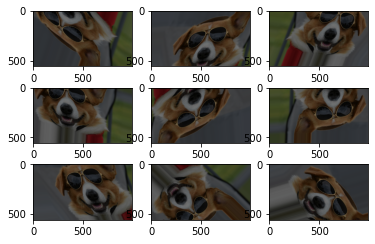

In [15]:
datagen = ImageDataGenerator(
            rotation_range               = 90,
            width_shift_range            = [100,100],   
            height_shift_range           = [100,100],   
            horizontal_flip              = True,   
            vertical_flip                = True,
            shear_range                  = 30,
            rescale                      = 1/2) 
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

Now we consider words, the necessary work is not so simple given the inherent complexity of the language (we cannot replace each word by its synonym and even if we do, we run the risk that the meaning of the sentence changes completely.
There are some libraries that can help us to carry out this task, we will start by analyzing the following:


1. Text Attack
2. Google Trans

# TextAttack
It is a Python framework for adversary attacks, adversary training, and data augmentation in NLP. We will focus only on data augmentation.

In [16]:
!pip install textattack

     |████████████████████████████████| 327kB 2.8MB/s 
     |████████████████████████████████| 3.0MB 11.9MB/s 
     |████████████████████████████████| 153kB 27.9MB/s 
     |████████████████████████████████| 1.7MB 30.4MB/s 
     |████████████████████████████████| 102kB 9.2MB/s 
     |████████████████████████████████| 61kB 5.6MB/s 
     |████████████████████████████████| 245kB 38.9MB/s 
     |████████████████████████████████| 317kB 34.7MB/s 
     |████████████████████████████████| 235kB 41.7MB/s 
     |████████████████████████████████| 61kB 6.0MB/s 
     |████████████████████████████████| 1.1MB 43.6MB/s 
     |████████████████████████████████| 686kB 44.4MB/s 
     |████████████████████████████████| 778kB 38.5MB/s 
     |████████████████████████████████| 245kB 33.7MB/s 
     |████████████████████████████████| 17.3MB 236kB/s 
     |████████████████████████████████| 122kB 38.6MB/s 
     |████████████████████████████████| 163kB 47.4MB/s 
     |████████████████████████████████| 102kB 10.3MB/s

In [17]:
from textattack.augmentation import WordNetAugmenter, EmbeddingAugmenter, EasyDataAugmenter, CharSwapAugmenter

textattack: Updating TextAttack package dependencies.
textattack: Downloading NLTK required packages.


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


2020-10-17 00:10:13 INFO: Downloading default packages for language: en (English)...


KeyboardInterrupt: ignored

In [18]:
text = "Will you look back on life and say, I wish I had, or I’m glad I did?"

TextAttack provides us with four methods for data augmentation.


## WordNetAugmenter
Augments the text by replacing it with synonyms from the WordNet thesaurus (thesaurus).

WordNet is a lexical database for English. Nouns, verbs, adjectives, and adverbs are grouped into sets of cognitive synonyms (synsets), each of which expresses a different concept.
WordNet superficially resembles a thesaurus in that it groups words based on their meaning.


In [19]:
aug = WordNetAugmenter();
aug.augment(text)

NameError: ignored


## EmbeddingAugmenter
 Augment text by transforming words with their inlays, with a constraint to ensure that their cosine similarity is at least 0.8.


In [4]:
aug = EmbeddingAugmenter();
aug.augment(text)

NameError: ignored

## CharSwapAugmenter
Augment text by substituting, deleting, inserting, and swapping adjacent characters.

In [5]:
aug = CharSwapAugmenter()
aug.augment(text)

NameError: ignored


## EasyDataAugmenter
This augments the text with a combination of Wordnet synonym replacement, word deletion, word order changes, and synonym insertions. All these 4 functionalities occur randomly. So we will get different results every time we run the code. This returns 4 augmented results, unlike the other methods.


In [ ]:
aug = EasyDataAugmenter()
aug.augment(text)

['Will you look back front on life and say, I wish I had, or I’m glad I did?',
 'Will you look gage on life and say, I wish I had, or I’m glad I did?',
 'wish you look back on life and say, I Will I had, or I’m glad I did?',
 'Will you look back life and say, I wish I had, or I’m glad I did?']

Googletrans uses the Google Translate Ajax API for language detection and translation.

The key parameters for the ** translate () ** method are:



1. **src**: source language. this parameter is optional as **googletrans** will detect it.
2. **dest**: target language. Mandatory parameter.

1. **text**: the text to be translated from the source language to the target language. Mandatory parameter.





 



When using this method what happens is a retranslation, we go from the original language to a target language and then we return to the original, during this backtranslation, there is a slight change in the sentence between the original text and the backtranslated text, but the general meaning of the sentence is still preserved.

The supported languages ​​can be consulted at https://cloud.google.com/translate/docs/languages?hl=es

To obtain the best results it is recommended to do some tests with the languages, if the target language is very similar, the translation does not lose information, however there may be the problem that the translation is too literal, this becomes a bit of a problem. try and failure.


Some examples of languages:

*   Afrikáans	'af'

*   Chino (simplificado) 	'zh-CN o zh'

*   Esperanto	'eo'

*   Japonés	'ja'
*   Latín	'la'


*   Español	'es'


*   Turcomano	'tk'


*   Yiddish	'yi'

*   Zulú	'zu'



In [ ]:
!pip install googletrans

     |████████████████████████████████| 61kB 4.3MB/s 
     |████████████████████████████████| 51kB 7.6MB/s 
     |████████████████████████████████| 972kB 13.5MB/s 
     |████████████████████████████████| 71kB 10.8MB/s 
     |████████████████████████████████| 61kB 9.7MB/s 
     |████████████████████████████████| 102kB 12.6MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=9ec598d60050848178252b4865cf48c183ecd0e20fe43477001f02cc009d24ef
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=4a5e5eab9a5f1aed0dda9b8a3f0e66dedca848a10bb6448495fbda5dfbdc70cf
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [ ]:
from googletrans import Translator
translator = Translator()

In [ ]:
origin_text = "If at first you don’t succeed, try, try again."
text_trans = translator.translate(text=origin_text, dest='zu').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

If at first you don’t succeed, try, try again.
Uma ekuqaleni ungaphumeleli, zama, uzame futhi.
If at first you fail, try again.
